In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import evaltools as et, places, viz_tools, visualisations
import pandas as pd
import xarray as xr
import datetime as dt
import os 
import glob 
import cmocean 

%matplotlib inline

1.1363636363636362

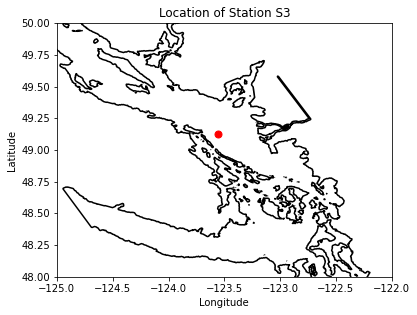

In [2]:
loc='S3'

# lat and lon informatin for place:
lon,lat=places.PLACES['S3']['lon lat']
# get place information on SalishSeaCast grid:
ij,ii=places.PLACES['S3']['NEMO grid ji']
# GEM2.5 grid ji is atm forcing grid for ops files
jw,iw=places.PLACES['S3']['GEM2.5 grid ji']

fig, ax = plt.subplots(1,1,figsize = (6,6))
with xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as mesh:
    ax.contour(mesh.nav_lon,mesh.nav_lat,mesh.tmask.isel(t=0,z=0),[0.1,],colors='k')
    tmask=np.array(mesh.tmask)
    gdept_1d=np.array(mesh.gdept_1d)
    e3t_0=np.array(mesh.e3t_0)
ax.plot(lon, lat, '.', markersize=14, color='red')
ax.set_ylim(48,50)
ax.set_xlim(-125,-122)
ax.set_title('Location of Station S3')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
viz_tools.set_aspect(ax,coords='map')

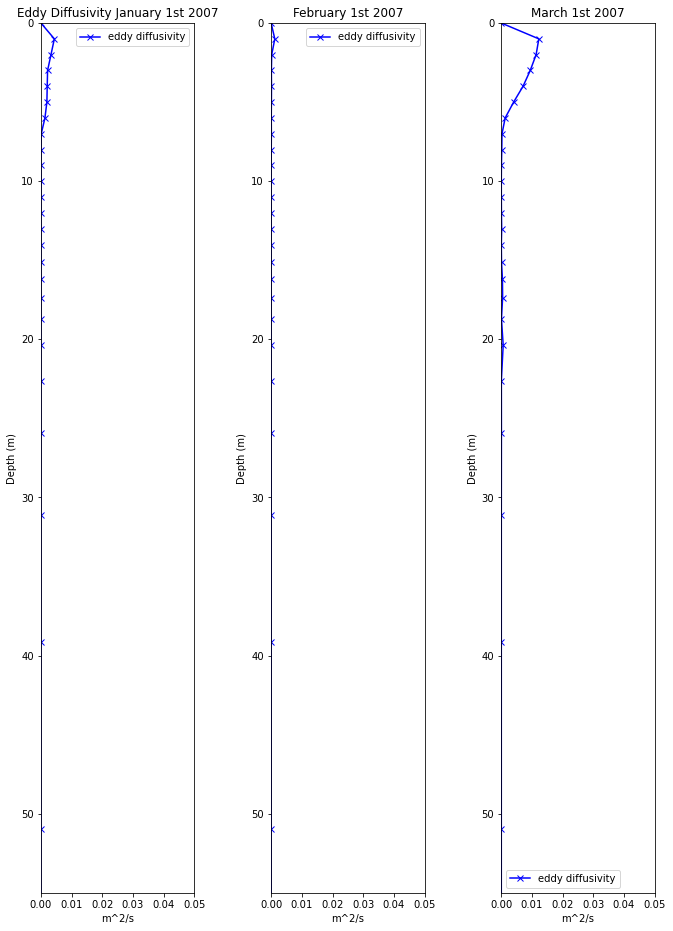

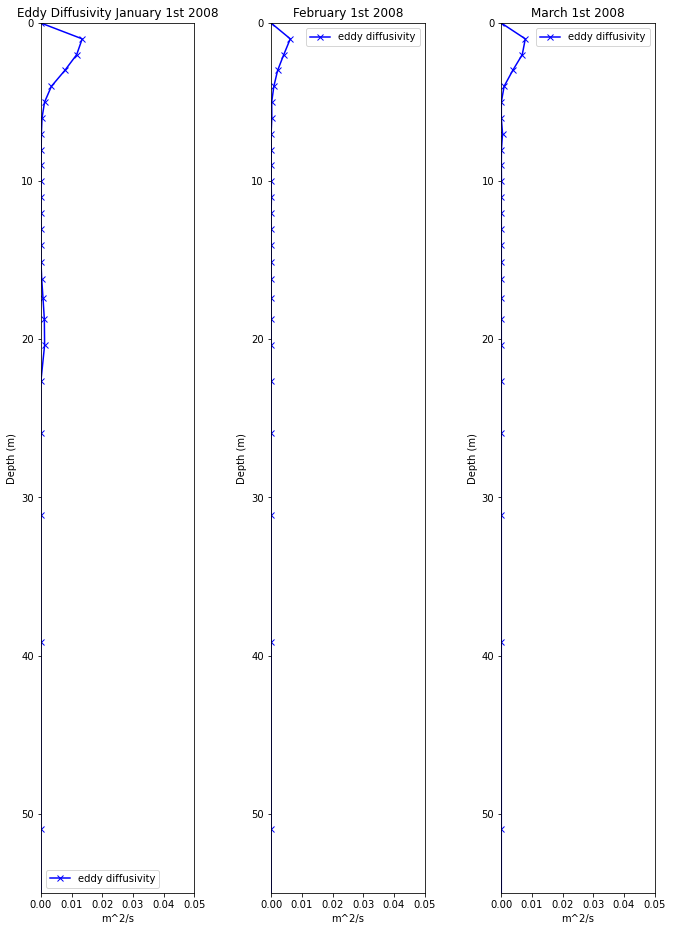

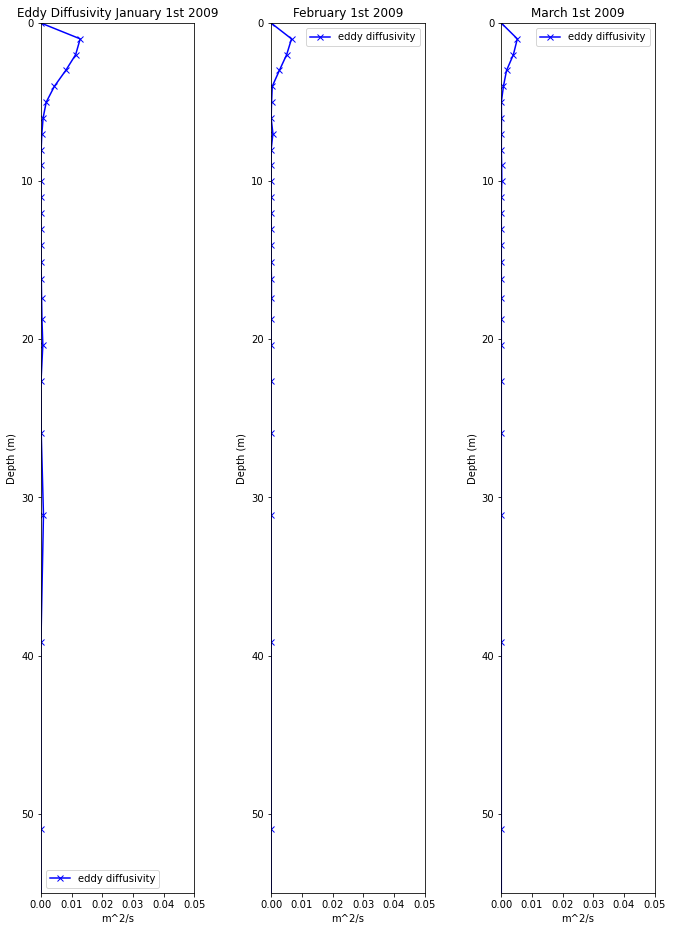

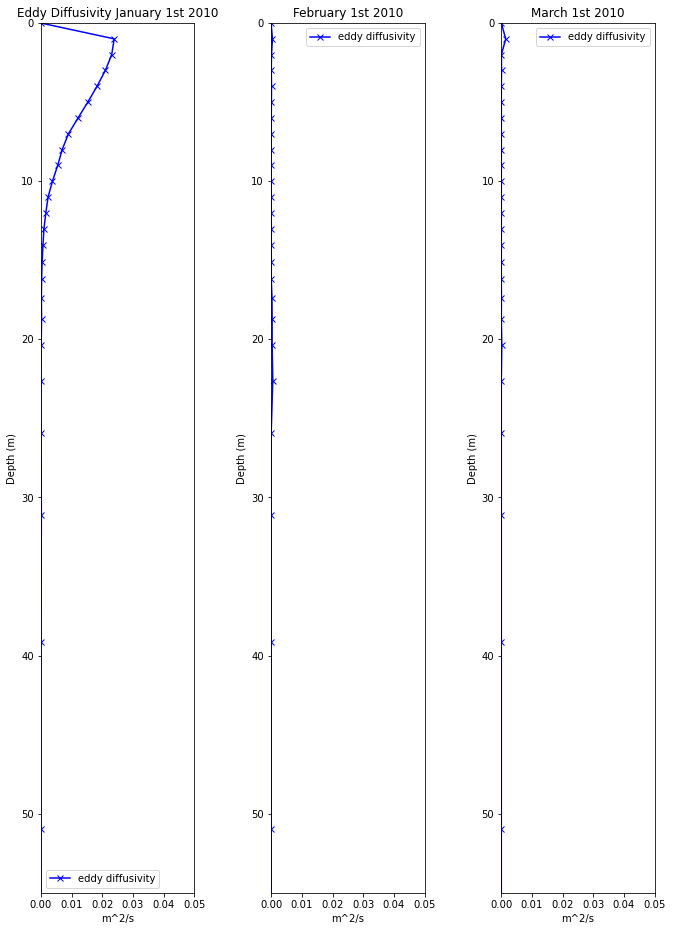

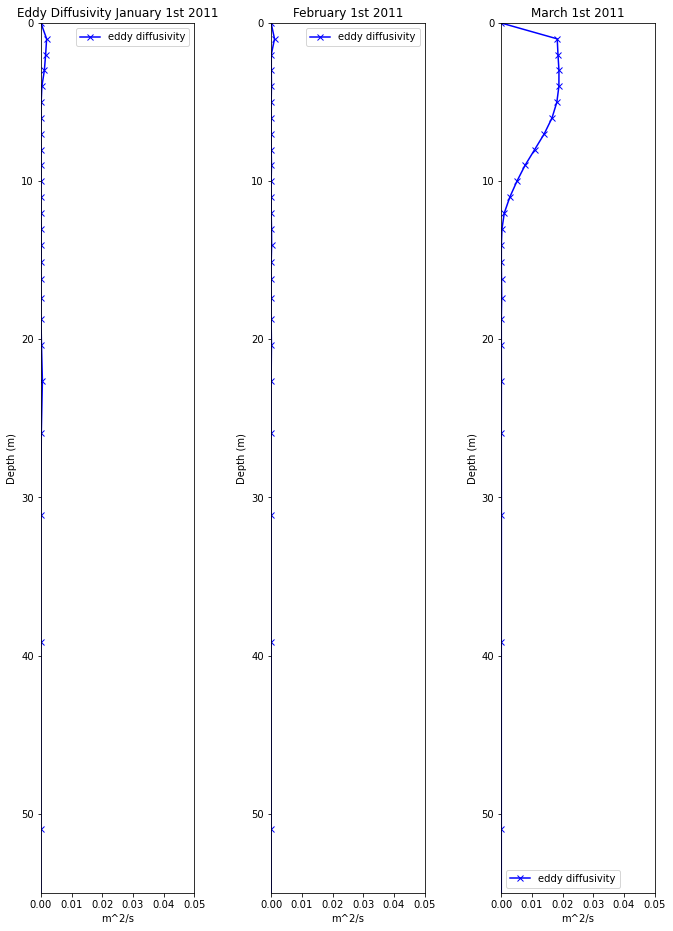

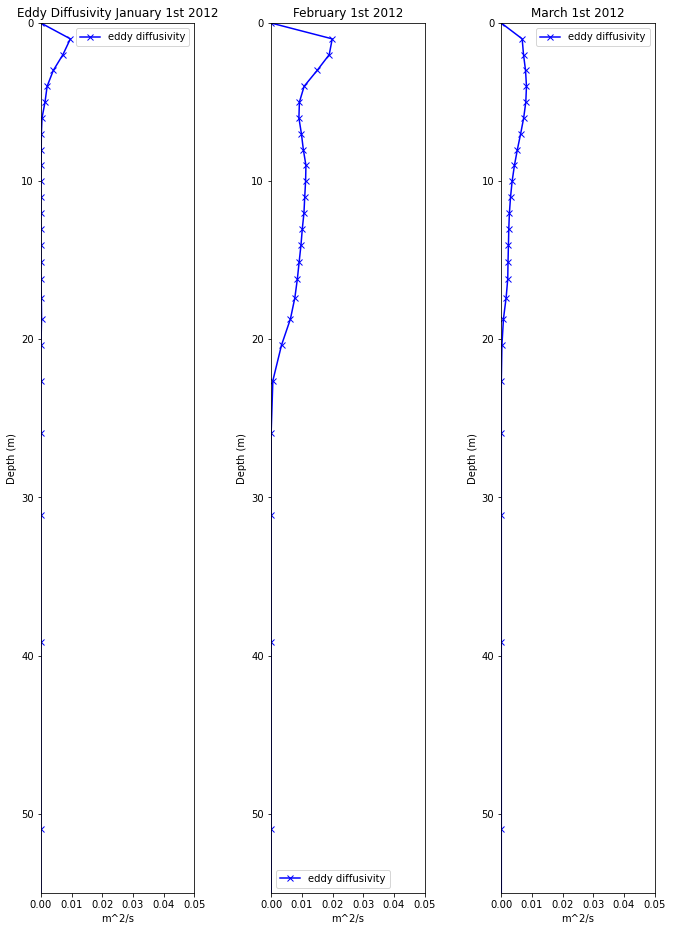

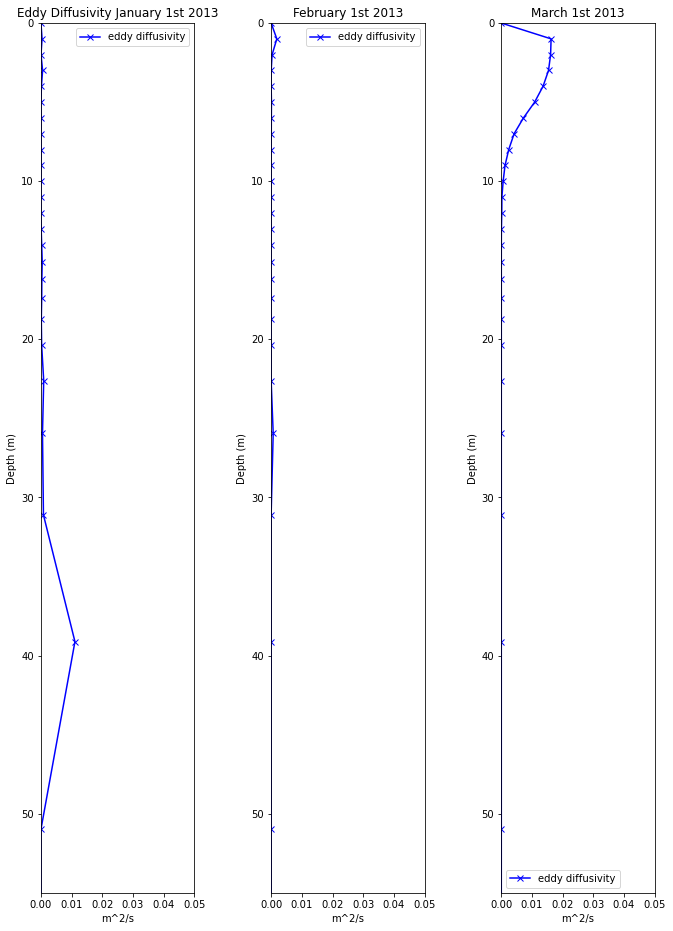

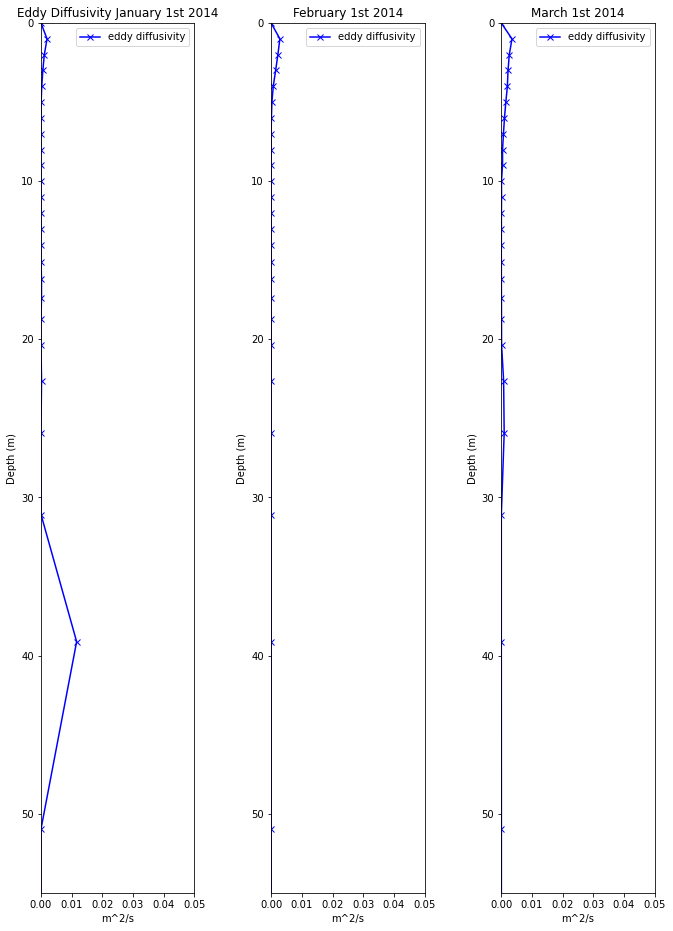

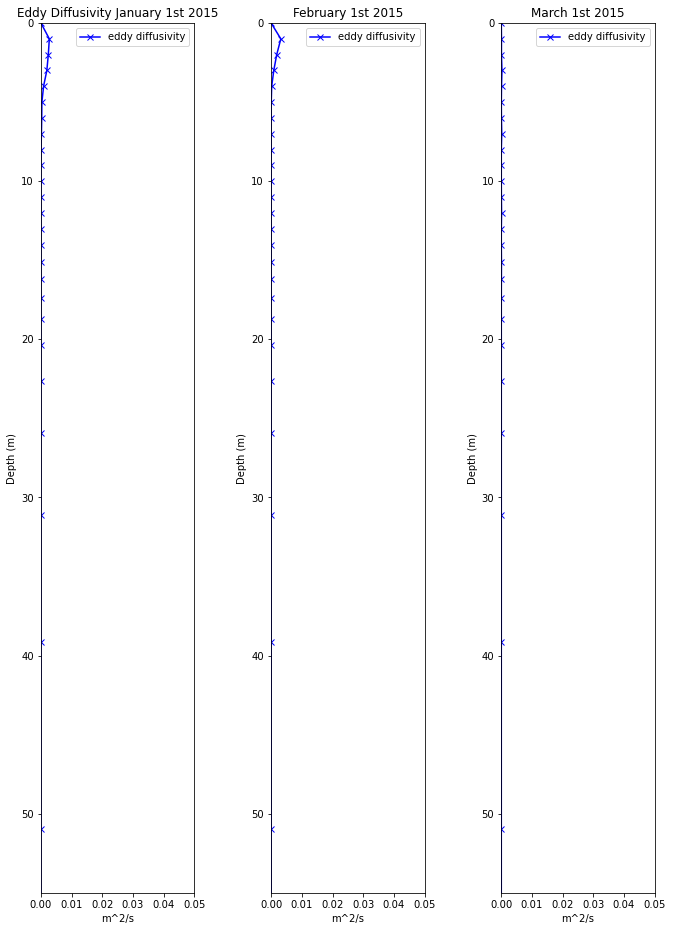

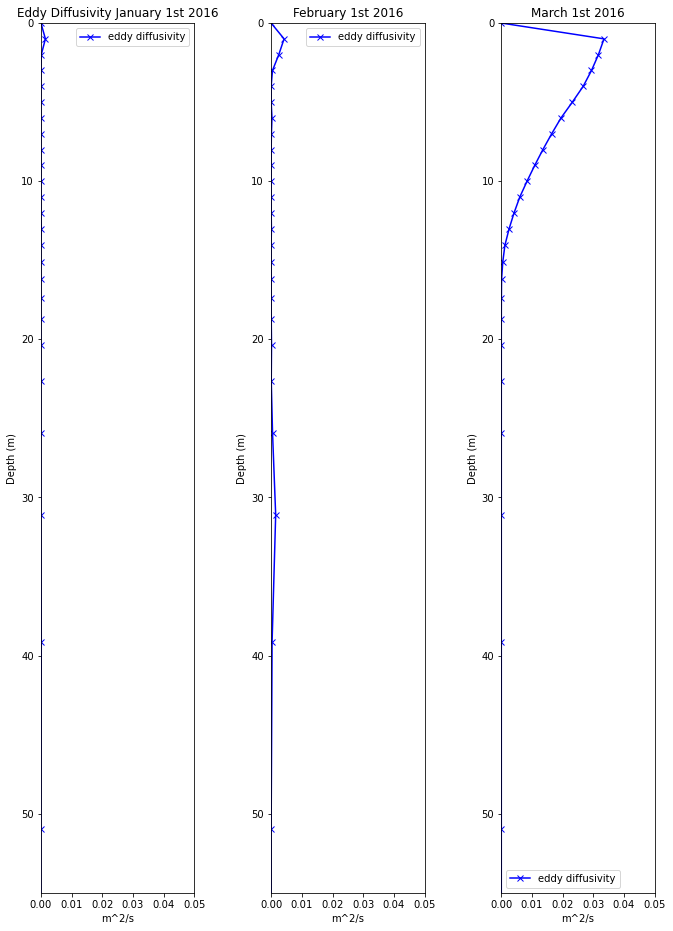

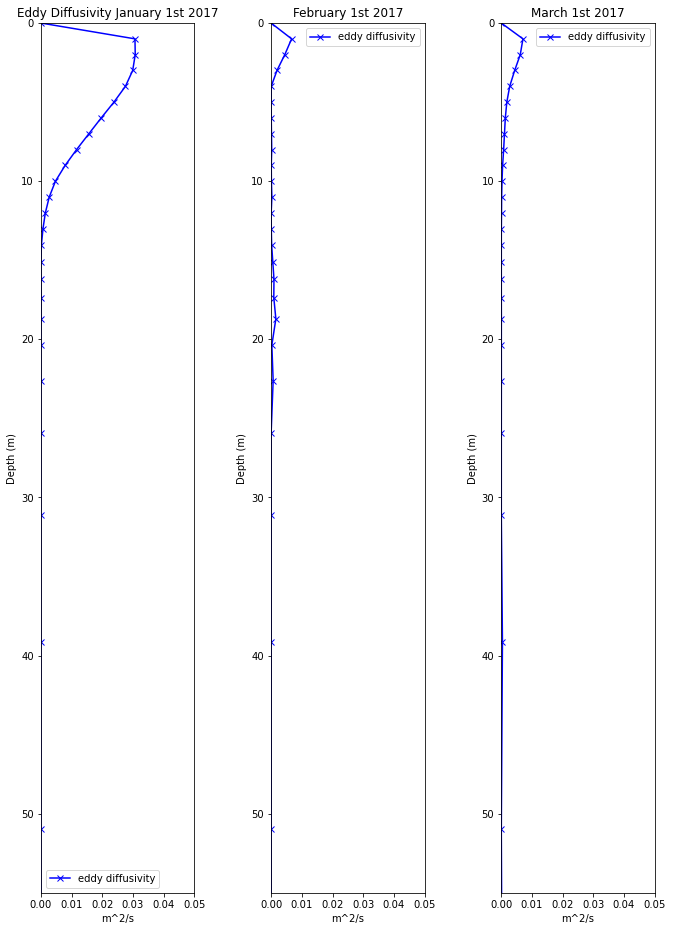

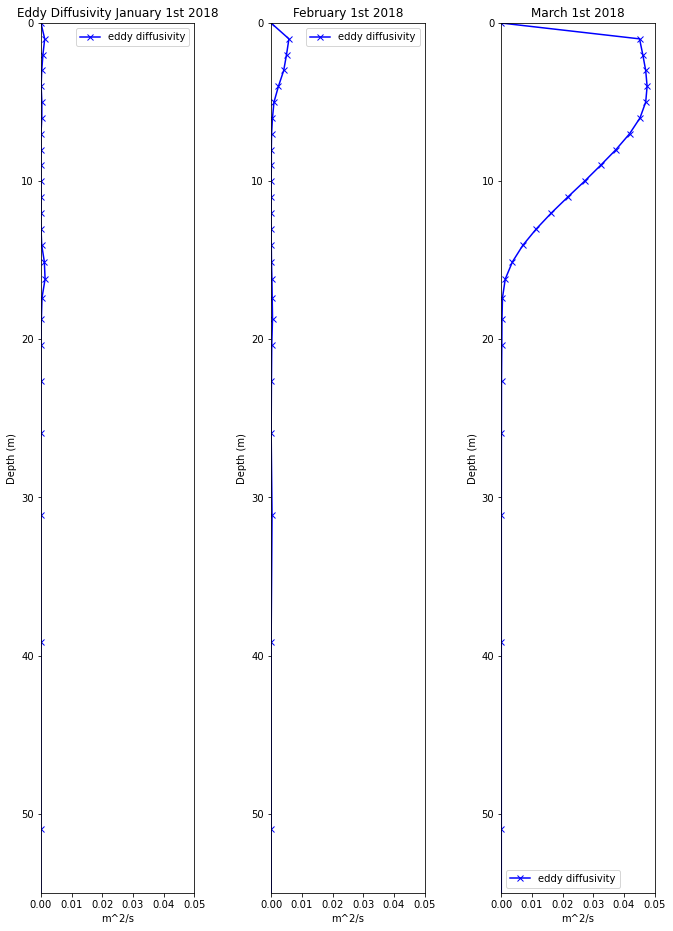

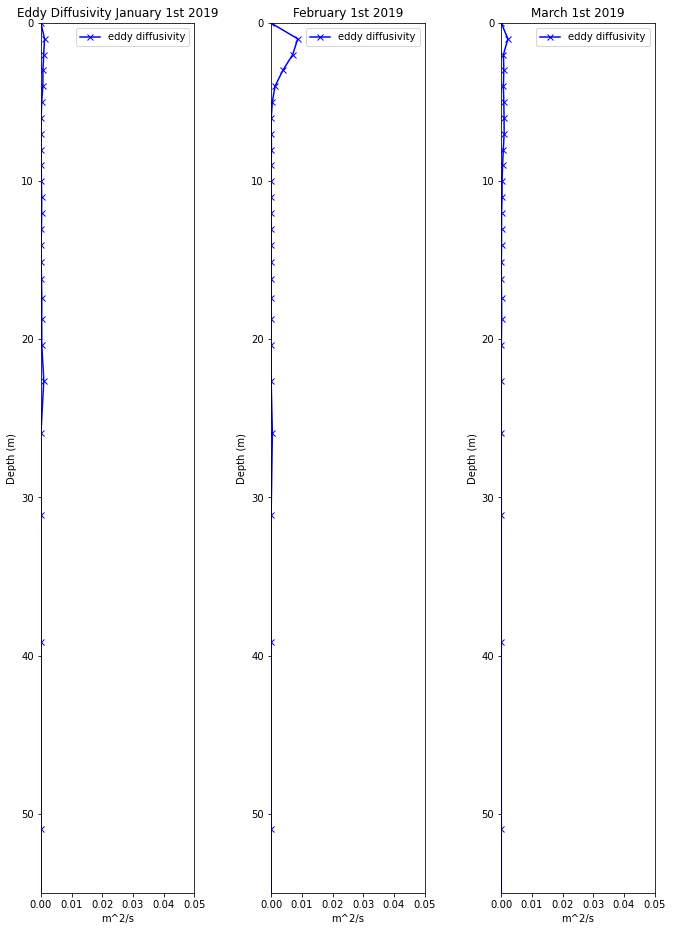

In [10]:

for iyear in range(2007,2020):
    dateslist=[[dt.datetime(iyear,1,1),dt.datetime(iyear,1,2)],
           [dt.datetime(iyear,2,1),dt.datetime(iyear,2,2)], # don't forget leap years: 2020,2016,2012,2008
           [dt.datetime(iyear,3,1),dt.datetime(iyear,3,2)]]
    eddy_S3=list()
    for ind, datepair in enumerate(dateslist):
        start=datepair[0]
        end=datepair[1] 
        basedir='/results2/SalishSea/nowcast-green.201905/'
        nam_fmt='nowcast'
        flen=1 # files contain 1 day of data each
        ftype= 'grid_W' # load bio files
        tres=1 # 1: hourly resolution; 24: daily resolution 
        flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)

        with xr.open_mfdataset(flist['paths']) as grid:
            eddy=np.mean(np.array(grid.vert_eddy_diff.isel(y=ij,x=ii)),axis=0)
            alldepth=np.array(grid.depthw)
            
        #get the land mask
        col_mask = tmask[0,:,ij,ii] 
        #get the depths of the watercolumn and filter only cells that have water
        depth_S3 = alldepth[col_mask==1]
        # do the same for eddy
        eddy_S3.append(eddy[col_mask==1])
        
    fig,ax=plt.subplots(1,3,figsize=(11,16))  # creates a figure "ax" with 2 plots, with the same y axis
    fig.subplots_adjust(wspace=.5)
    ax[0].plot(eddy_S3[0],depth_S3,'b-x',label='eddy diffusivity')
    ax[0].set_ylim(0,55)
    ax[0].set_xlim(0,0.05)
    ax[0].invert_yaxis()
    ax[0].legend()
    ax[0].set_xlabel('m^2/s')
    ax[0].set_title('Eddy Diffusivity January 1st %i' %iyear)
    ax[0].set_ylabel('Depth (m)')

    ax[1].plot(eddy_S3[1],depth_S3,'b-x',label='eddy diffusivity')
    ax[1].set_ylim(0,55)
    ax[1].set_xlim(0,0.05)
    ax[1].invert_yaxis()
    ax[1].legend()
    ax[1].set_xlabel('m^2/s')
    ax[1].set_title('February 1st %i' %iyear)
    ax[1].set_ylabel('Depth (m)')

    ax[2].plot(eddy_S3[2],depth_S3,'b-x',label='eddy diffusivity')
    ax[2].set_ylim(0,55)
    ax[2].set_xlim(0,0.05)
    ax[2].invert_yaxis()
    ax[2].legend()
    ax[2].set_xlabel('m^2/s')
    ax[2].set_title('March 1st %i' %iyear)
    ax[2].set_ylabel('Depth (m)')
        


Text(0.5, 1.0, 'calm day')

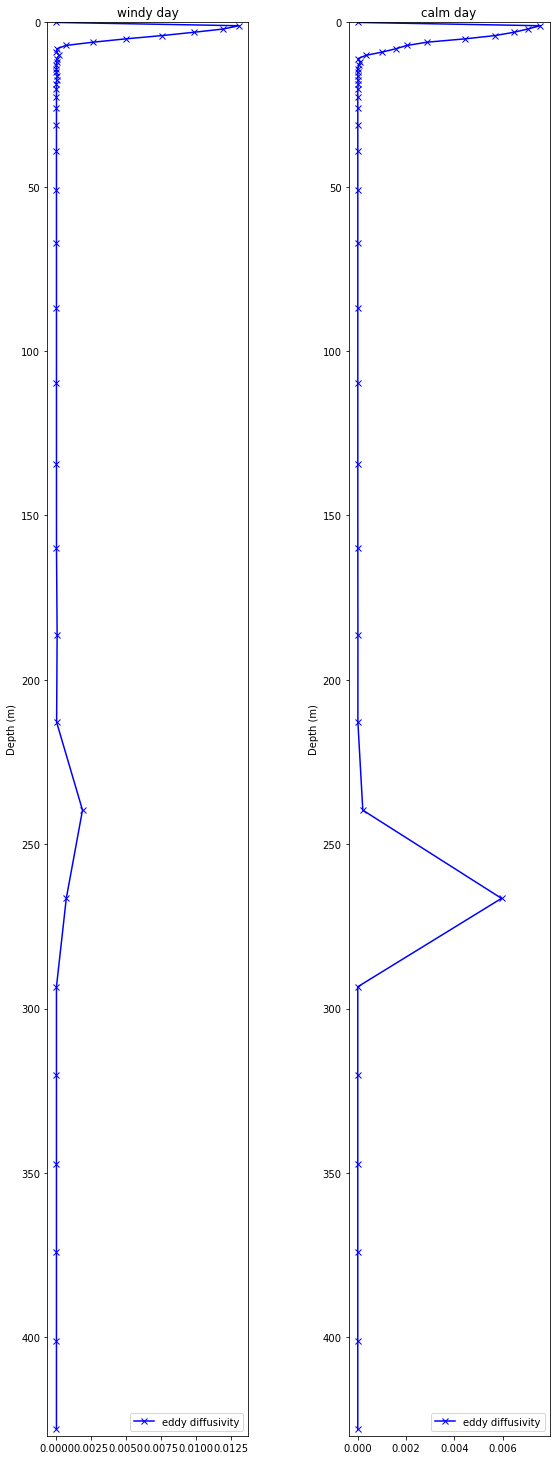

In [18]:
fig,ax=plt.subplots(1,2,figsize=(9,26))  # creates a figure "ax" with 2 plots, with the same y axis
fig.subplots_adjust(wspace=.5)
ax[0].plot(windy,depth,'b-x',label='eddy diffusivity')
ax[0].set_ylim(0,60)
ax[0].set_xlim(0,0.015)
ax[0].invert_yaxis()
ax[0].legend()
ax[0].set_xlabel('m^2/s')
ax[0].set_title('windy day')
ax[0].set_ylabel('Depth (m)')

ax[1].plot(calm,depth,'b-x',label='eddy diffusivity')
ax[1].set_ylim(0,60)
ax[0].set_xlim(0,0.015)
ax[1].invert_yaxis()
ax[1].legend()
ax[1].set_xlabel('m^2/s^3')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('calm day')

Text(0.5, 1.0, 'calm day')

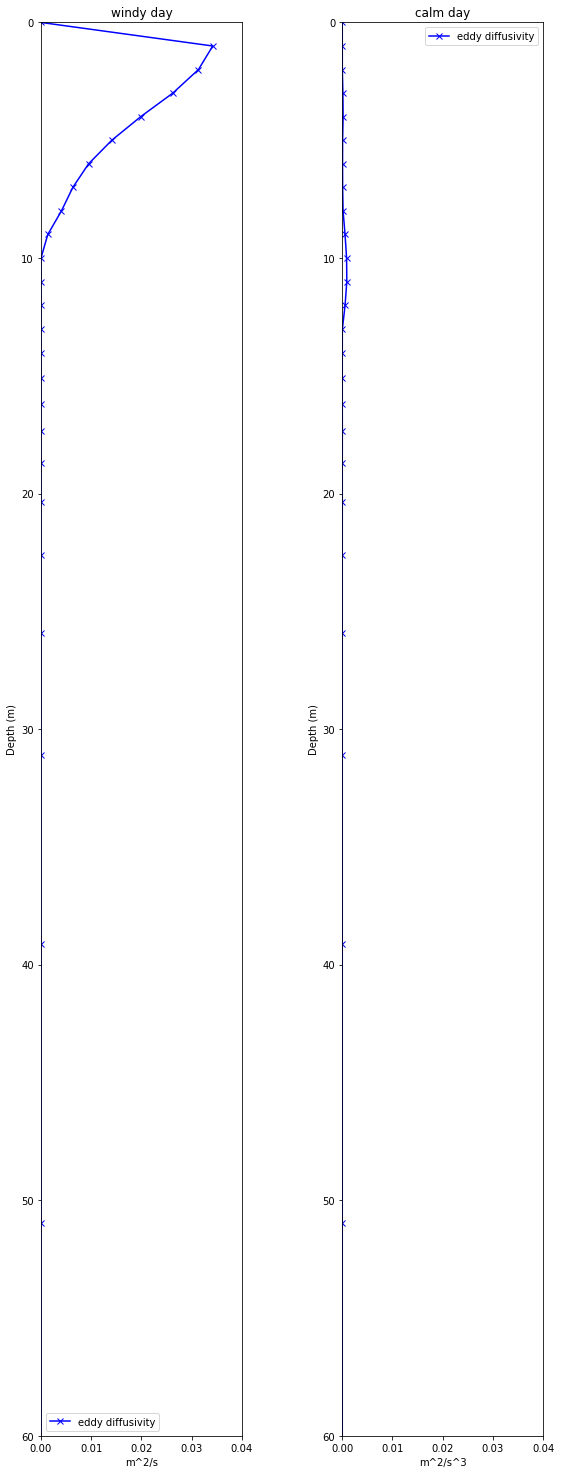

In [11]:
# A very windy day
start=dt.datetime(2018,5,29)
end=dt.datetime(2018,5,30) 
start2=dt.datetime(2018,5,2)
end2=dt.datetime(2018,5,3)
basedir='/results2/SalishSea/nowcast-green.201905/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'grid_W' # load bio files
tres=1 # 1: hourly resolution; 24: daily resolution 
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
flist2=et.index_model_files(start2,end2,basedir,nam_fmt,flen,ftype,tres)

with xr.open_mfdataset(flist['paths']) as grid:
    windy=np.mean(np.array(grid.vert_eddy_diff.isel(y=ij,x=ii)),axis=0)
    #diss=np.array(grid.dissipation.isel(y=ij,x=ii))
    depth=np.array(grid.depthw)

with xr.open_mfdataset(flist2['paths']) as grid:
    calm=np.mean(np.array(grid.vert_eddy_diff.isel(y=ij,x=ii)),axis=0)

fig,ax=plt.subplots(1,2,figsize=(9,26))  # creates a figure "ax" with 2 plots, with the same y axis
fig.subplots_adjust(wspace=.5)
ax[0].plot(windy,depth,'b-x',label='eddy diffusivity')
ax[0].set_ylim(0,60)
ax[0].set_xlim(0,0.04)
ax[0].invert_yaxis()
ax[0].legend()
ax[0].set_xlabel('m^2/s')
ax[0].set_title('windy day')
ax[0].set_ylabel('Depth (m)')

ax[1].plot(calm,depth,'b-x',label='eddy diffusivity')
ax[1].set_ylim(0,60)
ax[1].set_xlim(0,0.04)
ax[1].invert_yaxis()
ax[1].legend()
ax[1].set_xlabel('m^2/s^3')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('calm day')